In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, root_mean_squared_error

data = pd.read_parquet(r"C:\Users\sande\Desktop\NOTEBOOK JUPYTER\model_ready_trip_data.parquet")


data = data.sort_values(by='timestamp')
data.head()

,timestamp,Zone_ID,number_of_requests,hour_of_day,day_of_week,is_weekend
0,2024-12-31 20:30:00,48,1,20,1,False
1,2024-12-31 20:30:00,246,1,20,1,False
2,2024-12-31 20:30:00,249,1,20,1,False
3,2024-12-31 21:00:00,42,1,21,1,False
4,2024-12-31 21:00:00,141,1,21,1,False


In [4]:
features = ['Zone_ID', 'hour_of_day', 'day_of_week', 'is_weekend']
target = 'number_of_requests'

split_point = int(len(data) * 0.8)
train_df = data.iloc[:split_point]
test_df = data.iloc[split_point:]

In [5]:
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [6]:
print(f"Training data has {len(X_train)} rows.")
print(f"Testing data has {len(X_test)} rows.")

Training data has 125088 rows.
Testing data has 31272 rows.


In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [8]:
model.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


In [9]:
print("\nMaking predictions on the test set...")
predictions = model.predict(X_test)
print(predictions[:5])



Making predictions on the test set...
[40.43738159  1.51938889  1.06977778  3.48306999  2.42559957]


In [10]:
mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

In [11]:
print("\n--- Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("\nInterpretation: On average, the model's predictions are off by approximately " f"{mae:.2f} ride requests.")


--- Model Evaluation Results ---
Mean Absolute Error (MAE): 5.25
Root Mean Squared Error (RMSE): 11.65

Interpretation: On average, the model's predictions are off by approximately 5.25 ride requests.


In [16]:
import pandas as pd 

day_mapping = {'Monday': {'day_of_week':0, 'is_weekend':False},
               'Tuesday': {'day_of_week':1, 'is_weekend':False},
                'Wednesday': {'day_of_week':2, 'is_weekend':False},
                'Thursday': {'day_of_week':3, 'is_weekend':False},
                'Friday': {'day_of_week':4, 'is_weekend':False},
                'Saturday': {'day_of_week':5, 'is_weekend':True},
                'Sunday': {'day_of_week':6, 'is_weekend':True}}

zone_id = input("enter the zone id: ")
hour = input("enter the hour of the day: ")
day = input("enter the day of the week: ")

zoneid = int(zone_id)
hours = int(hour)
day_info = day_mapping.get(day.title())

input_data = {
    'Zone_ID' : [zoneid],
    'hour_of_day' : [hours],
    'day_of_week' : [day_info['day_of_week']],
    'is_weekend' : [day_info['is_weekend']]
}

inputdf = pd.DataFrame(input_data)

prediction = model.predict(inputdf)
print(prediction)


[1.00666667]


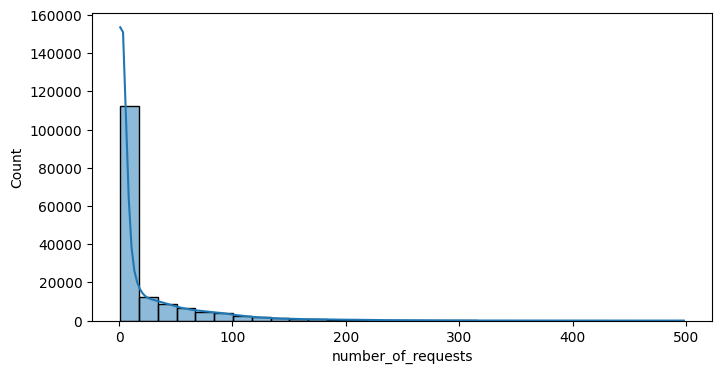

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(8,4))
sns.histplot(data['number_of_requests'], bins=30, kde=True)
plt.show()

In [16]:
numbers = data['Zone_ID'].unique()
print(sorted(numbers))
counts = data['Zone_ID'].value_counts()
print(counts)

[np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31), np.int32(32), np.int32(33), np.int32(34), np.int32(35), np.int32(36), np.int32(37), np.int32(38), np.int32(39), np.int32(40), np.int32(41), np.int32(42), np.int32(43), np.int32(44), np.int32(45), np.int32(46), np.int32(47), np.int32(48), np.int32(49), np.int32(50), np.int32(51), np.int32(52), np.int32(53), np.int32(54), np.int32(55), np.int32(56), np.int32(57), np.int32(58), np.int32(59), np.int32(60), np.int32(61), np.int32(62), np.int32(63), np.int32(64), np.int32(65), np.int32(66), np.int32(67), np.int32(68), np.int32(69), np.int32(70), np.int32(71), np.int32(72), 